# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import csv
import os
from pprint import pprint as pp
import scipy.stats as st
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Output File (CSV)
output_directory = 'output_data'
output_data_file = "cities.csv"

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

In [2]:
pip install citipy

Note: you may need to restart the kernel to use updated packages.


### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 617


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key 

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | hobart
Processing Record 2 of Set 1 | kaitangata
Processing Record 3 of Set 1 | albany
Processing Record 4 of Set 1 | hilo
Processing Record 5 of Set 1 | jamestown
Processing Record 6 of Set 1 | rikitea
Processing Record 7 of Set 1 | bairiki
Processing Record 8 of Set 1 | thompson
Processing Record 9 of Set 1 | saskylakh
Processing Record 10 of Set 1 | chokurdakh
Processing Record 11 of Set 1 | konstancin-jeziorna
Processing Record 12 of Set 1 | chuy
Processing Record 13 of Set 1 | alofi
Processing Record 14 of Set 1 | lovozero
Processing Record 15 of Set 1 | atuona
Processing Record 16 of Set 1 | mirador
Processing Record 17 of Set 1 | busselton
Processing Record 18 of Set 1 | santa engracia
Processing Record 19 of Set 1 | mbanza-ngungu
Processing Record 20 of Set 1 | dikson
Processing Record 21 of Set 1 | klaksvik
Processing Record 22 of Set 1 | marawi
Processing Record 23 of Set 1 | batagay-al

Processing Record 37 of Set 4 | russell
Processing Record 38 of Set 4 | port hedland
Processing Record 39 of Set 4 | mogadishu
Processing Record 40 of Set 4 | sentyabrskiy
City not found. Skipping...
Processing Record 41 of Set 4 | namibe
Processing Record 42 of Set 4 | saint george
Processing Record 43 of Set 4 | sindou
Processing Record 44 of Set 4 | constitucion
Processing Record 45 of Set 4 | sydney
Processing Record 46 of Set 4 | victoria
Processing Record 47 of Set 4 | sitka
Processing Record 48 of Set 4 | karamay
City not found. Skipping...
Processing Record 49 of Set 4 | abu dhabi
Processing Record 0 of Set 5 | itarema
Processing Record 1 of Set 5 | cidreira
Processing Record 2 of Set 5 | lorengau
Processing Record 3 of Set 5 | koutsouras
Processing Record 4 of Set 5 | atambua
Processing Record 5 of Set 5 | arequipa
Processing Record 6 of Set 5 | horqueta
Processing Record 7 of Set 5 | khairpur
Processing Record 8 of Set 5 | mount isa
Processing Record 9 of Set 5 | coquimbo
Pro

Processing Record 24 of Set 8 | torbay
Processing Record 25 of Set 8 | kuryk
Processing Record 26 of Set 8 | vila velha
Processing Record 27 of Set 8 | shitanjing
Processing Record 28 of Set 8 | mlonggo
Processing Record 29 of Set 8 | conakry
Processing Record 30 of Set 8 | aklavik
Processing Record 31 of Set 8 | maloshuyka
City not found. Skipping...
Processing Record 32 of Set 8 | upington
Processing Record 33 of Set 8 | okaihau
Processing Record 34 of Set 8 | srikakulam
Processing Record 35 of Set 8 | sorvag
City not found. Skipping...
Processing Record 36 of Set 8 | sondrio
Processing Record 37 of Set 8 | esperance
Processing Record 38 of Set 8 | olinda
Processing Record 39 of Set 8 | parabel
Processing Record 40 of Set 8 | aflu
City not found. Skipping...
Processing Record 41 of Set 8 | tombouctou
Processing Record 42 of Set 8 | bacuit
City not found. Skipping...
Processing Record 43 of Set 8 | darab
Processing Record 44 of Set 8 | proletariy
Processing Record 45 of Set 8 | scotts

Processing Record 13 of Set 12 | north bend
Processing Record 14 of Set 12 | spearfish
Processing Record 15 of Set 12 | lasa
Processing Record 16 of Set 12 | kattivakkam
Processing Record 17 of Set 12 | namatanai
Processing Record 18 of Set 12 | tautira
Processing Record 19 of Set 12 | lakes entrance
Processing Record 20 of Set 12 | vasterhaninge
Processing Record 21 of Set 12 | marathon
Processing Record 22 of Set 12 | savannah bight
Processing Record 23 of Set 12 | rio grande
Processing Record 24 of Set 12 | acapulco
Processing Record 25 of Set 12 | attawapiskat
City not found. Skipping...
Processing Record 26 of Set 12 | cairns
Processing Record 27 of Set 12 | san javier
Processing Record 28 of Set 12 | victor harbor
Processing Record 29 of Set 12 | solnechnyy
Processing Record 30 of Set 12 | atar
Processing Record 31 of Set 12 | nsoko
Processing Record 32 of Set 12 | lagdo
Processing Record 33 of Set 12 | general pico
Processing Record 34 of Set 12 | hovd
Processing Record 35 of Se

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Extract relevant fields from the data frame
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

# Export the City_Data into a csv
city_data_df.to_csv(output_data_file, index_label="City_ID")

# Show Record Count
city_data_df.count()

City          565
Lat           565
Lng           565
Max Temp      565
Humidity      565
Cloudiness    565
Wind Speed    565
Country       565
Date          565
dtype: int64

In [69]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,yellowknife,62.4560,-114.3525,-8.88,77,100,8.05,CA,1670215568
1,carnarvon,-24.8667,113.6333,76.35,62,2,15.21,AU,1670215785
2,provideniya,64.3833,-173.3000,26.20,93,100,21.03,RU,1670215786
3,mar del plata,-38.0023,-57.5575,64.09,93,1,3.00,AR,1670215786
4,kapaa,22.0752,-159.3190,79.12,81,0,8.05,US,1670215588


In [71]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data_file", index_label="City_ID")

In [72]:
# Read saved data
city_data_df = pd.read_csv("output_data_file", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,yellowknife,62.4560,-114.3525,-8.88,77,100,8.05,CA,1670215568
1,carnarvon,-24.8667,113.6333,76.35,62,2,15.21,AU,1670215785
2,provideniya,64.3833,-173.3000,26.20,93,100,21.03,RU,1670215786
3,mar del plata,-38.0023,-57.5575,64.09,93,1,3.00,AR,1670215786
4,kapaa,22.0752,-159.3190,79.12,81,0,8.05,US,1670215588


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

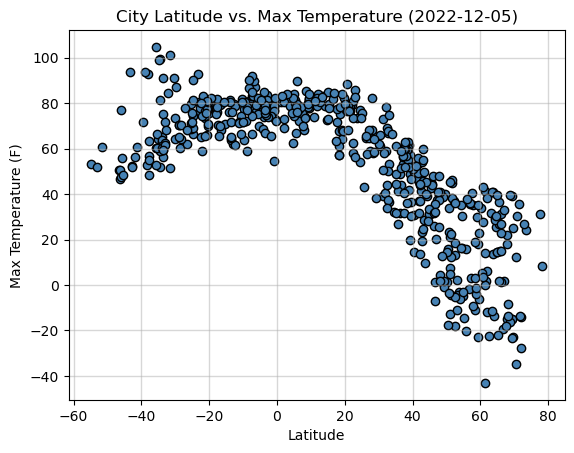

In [28]:
# Build scatter plot for latitude vs. temperature
# Create Latitude vs. Temperature Plot scatter plot
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], facecolor = "steelblue", edgecolor = "black")

# Set title
plt.title("City Latitude vs. Max Temperature (2022-12-05)")

# Set x axis label
plt.xlabel("Latitude")

# Set y axis label
plt.ylabel("Max Temperature (F)")

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("City Latitude vs Max Temperature")

#### Latitude Vs. Humidity

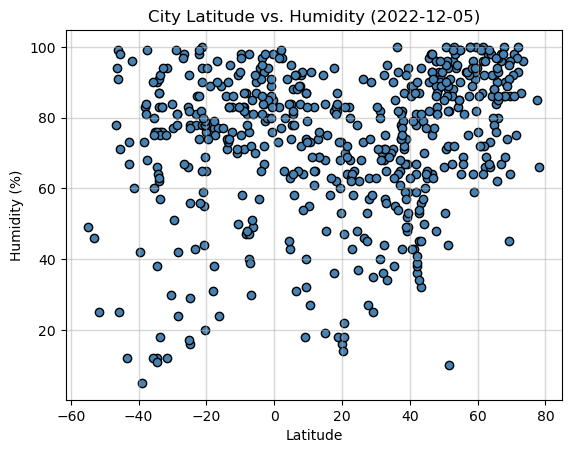

In [29]:
# Create Latitude vs. Humidity Plot scatter plot
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], facecolor = "steelblue", edgecolor = "black")

# Set title
plt.title("City Latitude vs. Humidity (2022-12-05)")

# Set x axis label
plt.xlabel("Latitude")

# Set y axis label
plt.ylabel("Humidity (%)")

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("City Latitude vs Humidity")

#### Latitude Vs. Cloudiness

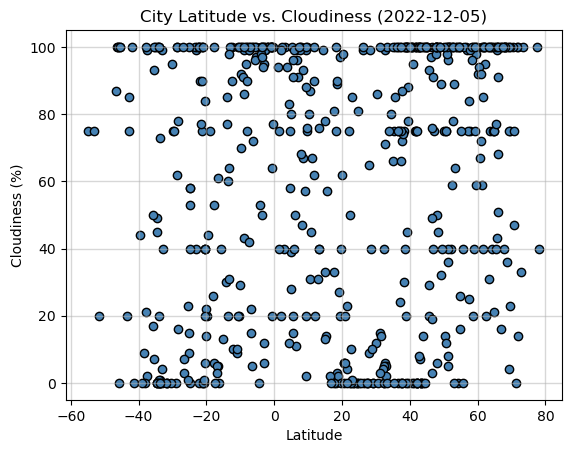

In [30]:
# Create Latitude vs. Cloudiness Plot scatter plot
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], facecolor = "steelblue", edgecolor = "black")

# Set title
plt.title("City Latitude vs. Cloudiness (2022-12-05)")

# Set x axis label
plt.xlabel("Latitude")

# Set y axis label
plt.ylabel("Cloudiness (%)")

# Set y axis limit
plt.ylim(-5,105)

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("City Latitude vs Cloudiness")

#### Latitude vs. Wind Speed Plot

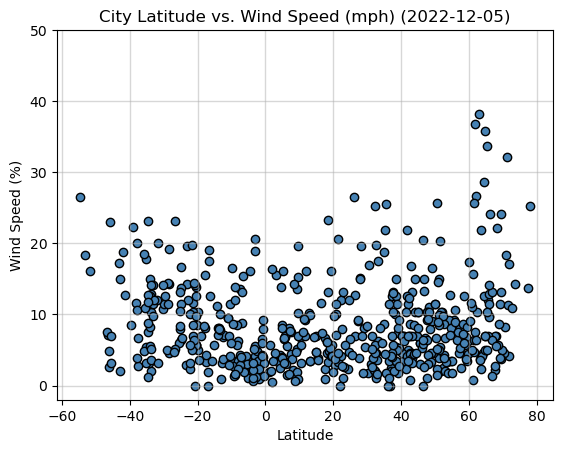

In [31]:
# Create Latitude vs. Wind Speed scatter plot
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], facecolor = "steelblue", edgecolor = "black")

# Set title
plt.title("City Latitude vs. Wind Speed (mph) (2022-12-05)")

# Set x axis label
plt.xlabel("Latitude")

# Set y axis label
plt.ylabel("Wind Speed (%)")

# Set y axis limit
plt.ylim(-2,50)

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("City Latitude vs Wind Speed (mph)")

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [32]:
# Define function for creating linear agression and scatter plot
def linear_agression(x,y):
    print(f"The r-squared is : {round(st.pearsonr(x, y)[0],2)}")
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x, y)
    plt.plot(x,regress_values,"r-")
    return line_eq

# Define a fuction for annotating
def annotate(line_eq, a, b):
    plt.annotate(line_eq,(a,b),fontsize=15,color="red")


In [33]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# Create Northern and Southern Hemisphere DataFrames
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
2,albany,42.6001,-73.9662,44.38,45,100,7.00,US,1670269317
3,hilo,19.7297,-155.0900,82.27,73,40,5.75,US,1670269160
4,jamestown,42.0970,-79.2353,46.53,36,0,11.50,US,1670269198
6,bairiki,1.3292,172.9752,80.60,83,75,5.75,KI,1670269341
7,thompson,55.7435,-97.8558,-20.04,69,40,9.22,CA,1670269342


In [34]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,hobart,-42.8794,147.3294,52.27,73,75,14.97,AU,1670269340
1,kaitangata,-46.2817,169.8464,46.44,94,100,7.05,NZ,1670269341
5,rikitea,-23.1203,-134.9692,75.47,81,99,14.25,PF,1670269341
11,chuy,-33.6971,-53.4616,75.24,57,0,10.40,UY,1670269343
12,alofi,-19.0595,-169.9187,80.49,89,75,6.91,NU,1670269192


###  Temperature vs. Latitude Linear Regression Plot



The r-squared is : -0.84


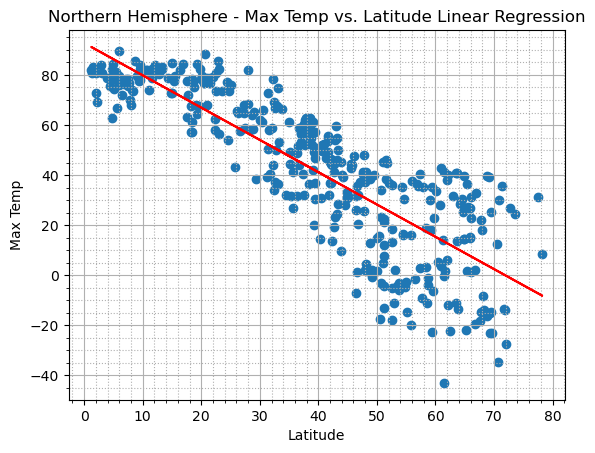

In [35]:
# Linear regression on Northern Hemisphere
# Call an function #1
equation = linear_agression(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"])

# Call an function #2
annotate(equation, 40, 310)

# Set a title
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")

#Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Max Temp")

# Set grid format
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')

# Save the figure
plt.savefig("Northern Hemisphere - Max Temp vs Latitude Linear Regression")

There is a strong negative correlation between latitude and max temperature for the northern hemisphere.

The r-squared is : 0.42


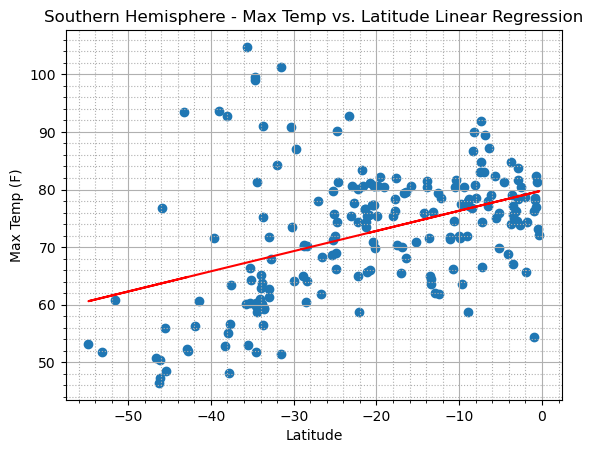

In [36]:
# Linear regression on Southern Hemisphere
# Call an function #1
equation = linear_agression(southern_hemi_df["Lat"],southern_hemi_df["Max Temp"])

# Call an function #2
annotate(equation, -30, 275)

# Set a title
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Max Temp (F)")

# Set grid format
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')

# Save the figure
plt.savefig("Southern Hemisphere - Max Temp vs Latitude Linear Regression")

There is a moderate positive correlation between latitude and max temperature for the southern hemisphere.

### Humidity vs. Latitude Linear Regression Plot

The r-squared is : 0.33


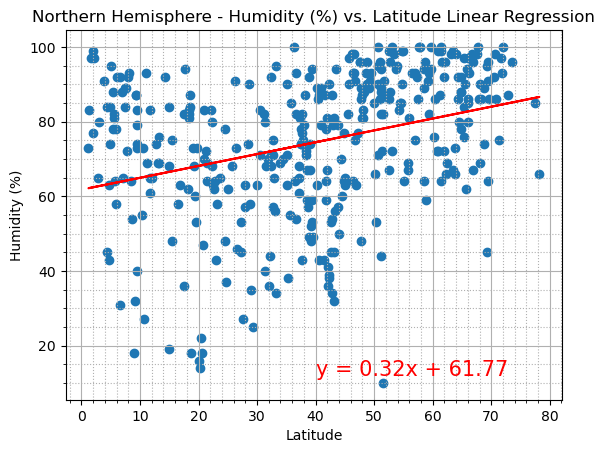

In [37]:
# Northern Hemisphere
# Call an function #1
equation = linear_agression(northern_hemi_df["Lat"], northern_hemi_df["Humidity"])

# Call an function #2
annotate(equation, 40, 12)

# Set a title
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Humidity (%)")

# Set grid format
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')

# Save the figure
plt.savefig("Northern Hemisphere - Humidity (%) vs Latitude Linear Regression")

There is a weak positive correlation between latitude and humidity for the northern hemisphere.

The r-squared is : 0.25


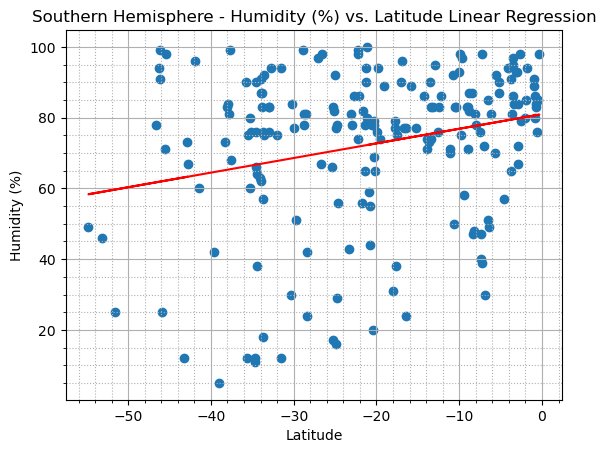

In [38]:
# Southern Hemisphere
# Call an function #1
equation = linear_agression(southern_hemi_df["Lat"], southern_hemi_df["Humidity"])

# Call an function #2
annotate(equation, 40, 12)

# Set a title
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Humidity (%)")

# Set grid format
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')

# Save the figure
plt.savefig("Southern Hemisphere - Humidity (%) vs Latitude Linear Regression")

There is a weak positive correlation between latitude and humidity for the southern hemisphere.



### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is : 0.2


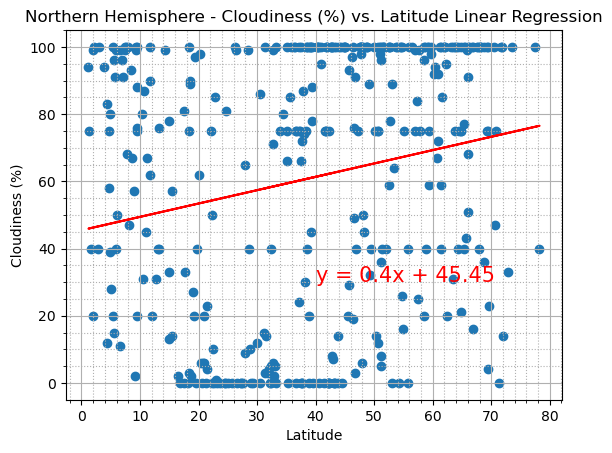

In [39]:
# Northern Hemisphere
# Call an function #1
equation = linear_agression(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"])

# Call an function #2
annotate(equation, 40, 30)
# Set a title
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Cloudiness (%)")

# Set Grid
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')

# Save the figure
plt.savefig("Northern Hemisphere - Cloudiness (%) vs Latitude Linear Regression")

There is a weak negative correlation between latitude and cloudiness for the northern hemisphere.

The r-squared is : 0.26


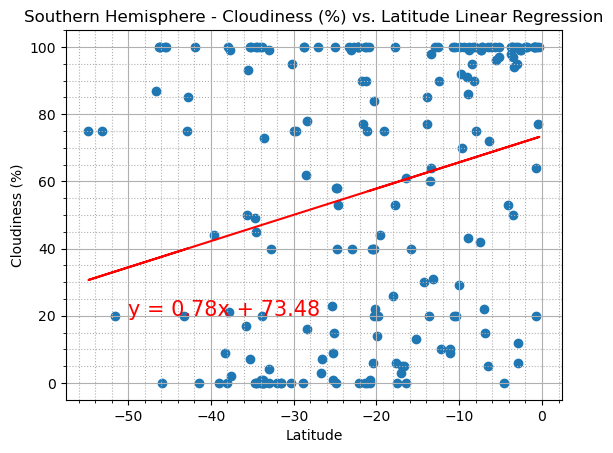

In [40]:
# Southern Hemisphere
# Call an function #1
equation = linear_agression(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"])

# Call an function #2
annotate(equation, -50, 20)

# Set a title
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Cloudiness (%)")

# Set Grid
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')

# Save the figure
plt.savefig("Southern Hemisphere - Cloudiness (%) vs Latitude Linear Regression")

There is a weak positive correlation between latitude and cloudiness for the southern hemisphere.

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is : 0.22


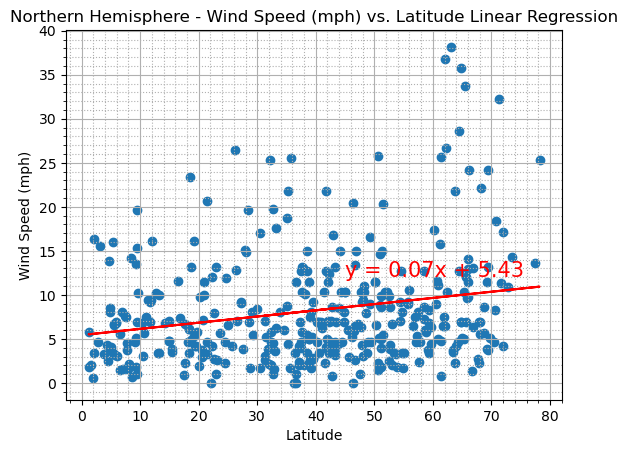

In [41]:
# Northern Hemisphere
# Call an function #1
equation = linear_agression(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"])

# Call an function #2
annotate(equation, 45, 12)

# Set  title
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Wind Speed (mph)")

# Set Grid
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')

# Save the figure
plt.savefig("Northern Hemisphere - Wind Speed vs Latitude Linear Regression")

In [42]:
There is a weak positive correlation between latitude and windspeed for the northern hemisphere.

SyntaxError: invalid syntax (827608203.py, line 1)

The r-squared is : -0.4


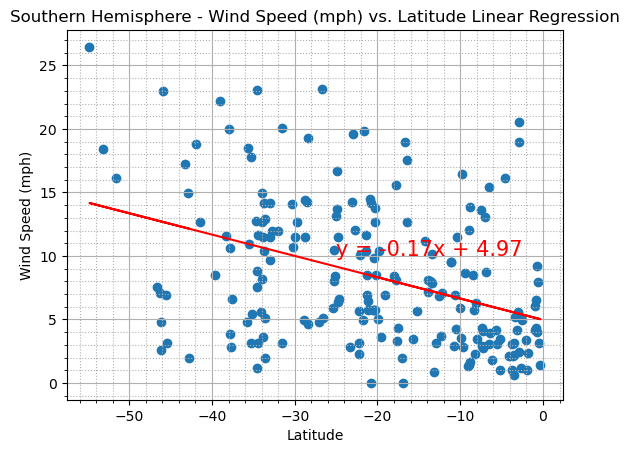

In [43]:
# Southern Hemisphere

# Call an function #1
equation = linear_agression(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"])

# Call an function #2
annotate(equation, -25, 10)

# Set a title
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Wind Speed (mph)")

# Set Grid
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')

# Save the figure
plt.savefig("Southern Hemisphere - Wind Speed vs Latitude Linear Regression")

There is a weak negative correlation between latitude and windspeed for the southern hemisphere.

# Analysis

The weather becomes significantly warmer as it approaches the equator (0 Deg. Latitude).The southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth. There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness. There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.